# Homework 10

Xinyi(Sharon) Wang

## The DBLP Publication Network

This dataset:

> http://konect.uni-koblenz.de/networks/dblp-author
  
contains a bipartite graph where the nodes are authors and academic papers. Each edge $(a,p)$ connects an author $a$ to a paper $p$. It contains 8.6 M edges (so it is a pretty large file). In this problem, we will analyze this data.

**Warmups:**

0. Find the minimum, maximum, and average, and standard deviation of the number of authors per paper.
0. Find the minimum, maximum, and average, and standard deviation of the number of papers per author.
0. Find the number of connected components of the network.
0. Pick several three metrics on graphs, evaluate them for this graph, and interpret their meanings. 

**Main question:**

Find the (not necessarily unique) author who has written the most papers. Call this author $X$. An author other than $X$ has an $X$-index of 1 if she has co-authored at least one paper with $X$. An author has an $X$-index of 2 if she does not have an $X$-index of 1, but has co-authored a paper with someone who has an $X$-index of 1. Similarly, you can define having an $X$-index of 3, 4, etc. 

Write a routine that produces the set of authors of a given index.

Make a plot with the $X$-index on the horizontal axis, and the number of authors with that $X$-index on the vertical axis. 

**Notes:** The network is encoded in the file above with two numbers per line separated by spaces. You will need to read that file using open and 'file.read' and turn it into a Python data string. Then use `split` to get a list of numbers. The numbers at even indices (starting at 0) are authors, and the numbers at odd indices are publications. Be careful not to do things that take a lot of operations or memory. The `networkx` library should work, as long as you don't try to draw the graph.

Also, you should develop your code using a smaller subset of the data so you do not spend a lot of time waiting. To facilitate this, I have put smaller subsets of the data here: 

  https://drive.google.com/drive/u/0/folders/1vwYKhqiD5GEFQi8WBMr63e2EUuk3DB22

The short version as 1,000 edges, the medium has 10,000 edges, the long version has 100,000 edges, and the "all" version has all the edges. 

<span style="color:blue">**Solutions**</span>

0. Find the minimum, maximum, average (mean of the data) and standard deviation (standard deviation of a normal distribution) of the number of authors per paper using python statistics funtions. 

1. Find the minimum, maximum, average (mean of the data) and standard deviation (standard deviation of a normal distribution) of the number of papers per author using python statistics funtions. 

2. Using python networks module to find the number of set of nodes such that each pair of nodes is connected by a path. 

3. a) Find the density of the graph: A dense graph means the number of edges is close to the maximal number of edges. The density for undirected graph is $$ d=\frac{2m}{n(n-1)}$$

   b) Find the average degree of the graph: degree of a node in graph is the number of edges that are incident to the node. 
   
   c) Calculate the number of authors with one publication divided by the total number of authors. 


Loading data......................................................................................

0.
Minimum # of authors per paper:  1
Maximum # of authors per paper:  119
Average # of authors per paper:  2.1621729185155556
Standard deviation of authors per paper:  1.5774377226087821

1.
Minimum # of papers per author:  1
Maximum # of papers per author:  951
Average # of papers per author:  6.066024085907479
Standard deviation of papers per author:  14.632955654262851

2.
Number of connected components:  117547

3.
Density of bipartite graph:  5.87547686186141e-07
Average degree of graph:  3.188011418433926
Percentage of authors with only one publication:  0.0009468282306305245

Main question.
Populating authors graph ...
X (author with most papers) =  69116


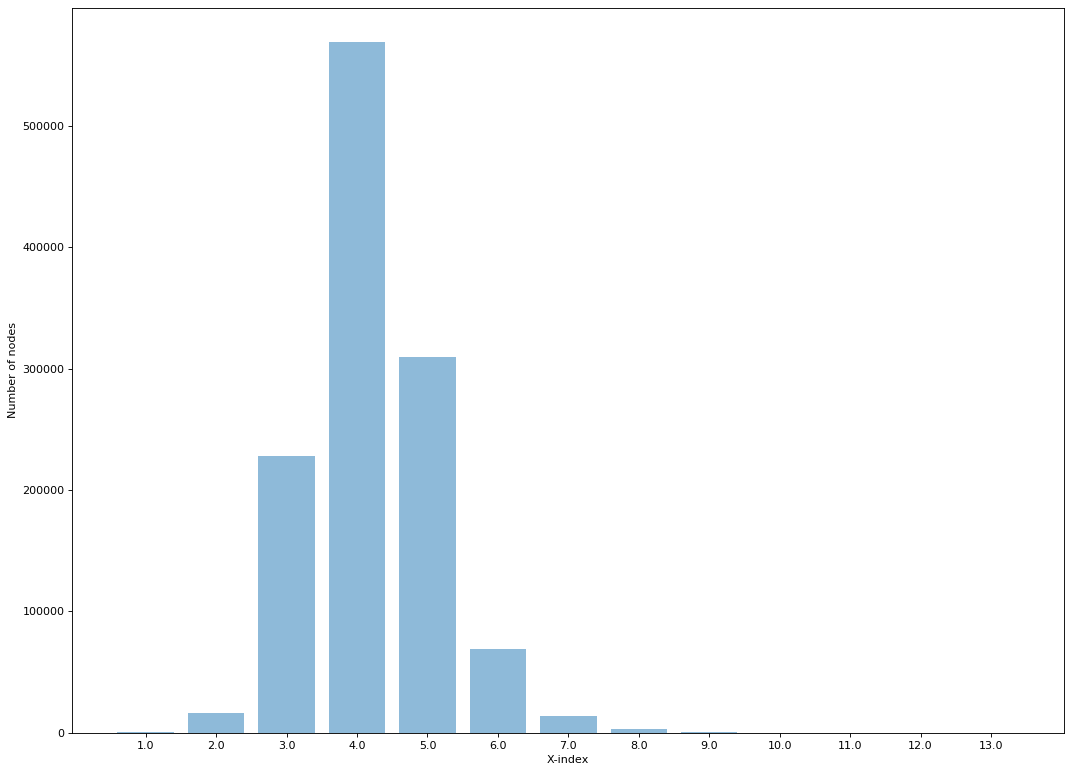

In [1]:
# NOTE: peak memory usage for this is around 6.7GB, needed to keep in memory the large graph and auxiliary variables

import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import networkx as nx
import numpy as np
import statistics
%matplotlib inline

# dictionary where for each publication we keep the list of authors that contributed
# will be used later to generate the authors graph
publications = {}
# dictionary where for each author we keep the number of publications they have contributed to
authors = {}
# bipartite graph
bipartite_graph = nx.Graph()
# authors graph (an edge means two authors have co-authored a paper)
authors_graph = nx.Graph()

# read the input file line by line
idx = 0
print("Loading data", end = '')

with open("out.dblp-author-all.txt", "r") as f:
    for line in f:
        l = line.strip().split(' ')
        author = int(l[0])
        # we apply a trick here; because we need to differentiate author IDs from publication IDs
        # we multiply the publication ID by -1, thus making it unique
        pub = int(l[1]) * -1
        
        # keep track of the authors that contributed to the publication
        if pub not in publications:
            publications[pub] = [ author ]
        elif author not in publications[pub]:
            publications[pub].append(author)
   
        # keep track of the publications that the author has contributed to
        if author not in authors:
            authors[author] = 1
        else:
            authors[author] = authors[author] + 1
            
        bipartite_graph.add_edge(author, pub)
        
        idx = idx + 1
        
        if idx % 100000 == 0:
            print(".", end = '')

print()
print()

print("0.")
publication_stats = [ len(v) for k, v in publications.items() ]
min_authors_per_paper = min(publication_stats)
print("Minimum # of authors per paper: ", min_authors_per_paper)
max_authors_per_paper = max(publication_stats)
print("Maximum # of authors per paper: ", max_authors_per_paper)
avg_authors_per_paper = statistics.mean(publication_stats)
print("Average # of authors per paper: ", avg_authors_per_paper)
stdev_authors_per_paper = statistics.stdev(publication_stats)
print("Standard deviation of authors per paper: ", stdev_authors_per_paper)

print()

print("1.")
author_stats = [ v for k,v in authors.items() ]
min_papers_per_author = min(author_stats)
print("Minimum # of papers per author: ", min_papers_per_author)
max_papers_per_author = max(author_stats)
print("Maximum # of papers per author: ", max_papers_per_author)
avg_paper_per_author = statistics.mean(author_stats)
print("Average # of papers per author: ", avg_paper_per_author)
stdev_papers_per_author = statistics.stdev(author_stats)
print("Standard deviation of papers per author: ", stdev_papers_per_author)

print()
print("2.")
components = nx.number_connected_components(bipartite_graph)
print("Number of connected components: ", components)

print()
print("3.")
print("Density of bipartite graph: ", nx.density(bipartite_graph))
# Average degree
print("Average degree of graph: ", 2 * bipartite_graph.number_of_edges() / float(bipartite_graph.number_of_nodes()))
# Percentage of authors with only one publication
authors_one_pub = 0
for k, v in authors.items():
    if v == 1:
        authors_one_pub = authors_one_pub + 1
print("Percentage of authors with only one publication: ", authors_one_pub / len(authors))

bipartite_graph = None

print()
print("Main question.")
print("Populating authors graph ...")

# now that we know for each paper the list of authors that contributed to it, we can build the authors graph
for k,v in publications.items():
    edges = list(itertools.combinations(v, 2))
    for e in edges:
        authors_graph.add_edge(e[0], e[1])

# we try to cache in the below variables the result of Dijkstra and re-use it, because it is expensive to run
paths = None
cached_node = None

def max_xindex(G, node):
    global paths
    global cached_node
    
    if paths is None or cached_node != node:
        # recompute Dijkstra to find the shortest path between the node passed as parameter and other nodes
        paths = nx.single_source_dijkstra_path_length(G, node)
        cached_node = node
    
    return max(paths.values())

def xindex(G, node, index):
    global paths
    global cached_node
    
    if paths is None or cached_node != node:
        # recompute Dijkstra to find the shortest path between the node passed as parameter and other nodes
        paths = nx.single_source_dijkstra_path_length(G, node)
        cached_node = node
    nodes = []
    
    # filter only to those nodes of interest (having index equal to the one passed in as parameter)
    for k, v in paths.items():
        if v == index:
            nodes.append(k)
            
    return nodes

# find the author with most papers
X = None
for k,v in authors.items():
    if v == max_papers_per_author:
        X = k
print("X (author with most papers) = ", X)

# get the maximum index for node X
max_idx = max_xindex(authors_graph, X)

# get all indexes for the node and plot them as a bar plot
indexes = np.linspace(1, max_idx, max_idx)
values = [ len(xindex(authors_graph, X, i)) for i in indexes ]
y_pos = np.arange(len(indexes))

figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, indexes)
plt.xlabel('X-index')
plt.ylabel('Number of nodes')

plt.show()

authors_graph = None